## 【problem1】Hypothetical function

In [1]:
def _linear_hypothesis(self, X):
    return np.dot(X, self.theta.T)

## 【problem2】Steepest descent

In [2]:
def _gradient_descent(self, X, y):
    h = np.dot(X, self.theta) - y
    dw = np.dot( X.T, (h-y) ) / len(y)
    self.theta = self.theta - self.lr*dW
    return self.theta

## 【problem 3】Estimated

In [3]:
def predict(self, X):
        y_approximated = self._linear_hypothesis(X)
        return y_approximated

## 【problem 4】Mean squared error

In [4]:
def MSE(y_pred, y):
    mse = np.square(y_pred - y).mean()
    return mse

## 【problem 5】Objective function

In [5]:
def _objective_function(self,y_pred,y):
        loss = np.square(y_pred-y)
        cost = np.sum(loss)/(2*len(y))
        return cost

In [6]:
import numpy as np

class ScratchLinearRegression():
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.theta = None
        self.verbose = verbose
       
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        if self.no_bias:
            self.theta = np.random.rand(len(X[0]))
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
            self.theta = np.random.rand(len(X[0]))
    
         
        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            y_pred_val = self.predict(X_val)
            
            self.theta = self._gradient_descent(X, y)
            
            self.loss[i] = self._objective_function(y_pred, y)
            self.val_loss[i] = self._objective_function(y_pred_val, y_val)
            
    def _linear_hypothesis(self, X):
        return np.dot(X, self.theta.T)
        
    def _gradient_descent(self, X, y):
        error = self._linear_hypothesis(X) - y
        self.theta -= (self.lr/len(X)) * np.matmul(error, X)
        return self.theta
    
    
    def _objective_function(self,y_pred,y):
        loss = np.sum((y_pred - y)**2)/(2*len(y))
        return loss

    def predict(self, X):
        if self.no_bias:
            pass
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
        y_approximated = self._linear_hypothesis(X)
        return y_approximated

## 【Problem 6】Learning and estimation

In [7]:
import pandas as pd
data = pd.read_csv("train.csv")
X1 = data.loc[:, ["GrLivArea", "YearBuilt"]]
y1 = data.loc[:, 'SalePrice']

X = X1.to_numpy()
y = y1.to_numpy()

In [8]:
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, y_train.shape

((1168, 2), (1168,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_Val = scaler.transform(X_val)

In [11]:
model = ScratchLinearRegression(num_iter=1000, lr=0.0001, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_val, y_val)
y_pred = model.predict(X_val)

print('Scratch Linear Regression MSE: {:.3g}'.format(MSE(y_val, y_pred)))

Scratch Linear Regression MSE: 2.23e+14


### Comparing with linear regression model from sklearn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

In [13]:
print('Sklearn Linear Regressor MSE: {:.3g}'.format(mean_squared_error(y_val, y_pred_lr)))

Sklearn Linear Regressor MSE: 1.84e+16


In [14]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_val,y_val)

print("Train Score:", train_score)
print("Test Score: ",test_score)

Train Score: 0.6466337010342488
Test Score:  -2401917.5367002776


## 【Problem 7】Learning curve plot

[]

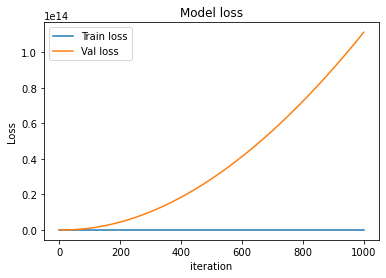

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure

plt.plot(np.arange(len(model.loss)), model.loss, label='Train loss')
plt.plot(np.arange(len(model.val_loss)), model.val_loss, label='Val loss')

plt.title('Model loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.plot()

## 【problem 8】(Advance task) Removal of bias term

In [18]:
model_nobias = ScratchLinearRegression(num_iter=1000, lr=0.0001, no_bias=True, verbose=True)
model_nobias.fit(X_train, y_train, X_val, y_val)
y_pred_nb = model_nobias.predict(X_val)

print('Scratch LinearRegression MSE: {:.3g}'.format(MSE(y_val, y_pred_nb)))

Scratch LinearRegression MSE: 2.23e+14


[]

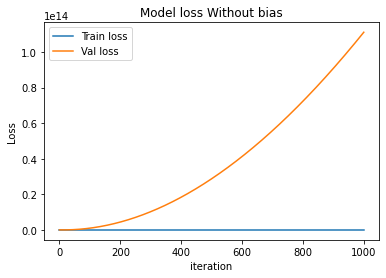

In [19]:
plt.figure

plt.plot(np.arange(len(model_nobias.loss)), model_nobias.loss, label='Train loss')
plt.plot(np.arange(len(model_nobias.val_loss)), model_nobias.val_loss, label='Val loss')

plt.title('Model loss Without bias')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.plot()

The bias reduces the mean square error of the model if compared to the case with bias.

## 【problem 9】(Advance task) Multidimensional feature quantity

In [20]:
np.random.seed(0)
X_2 = X**2
X_3 = X**3

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_2, y, test_size=0.2)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_3, y, test_size=0.2)

scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
Xval2 = scaler.transform(X_val2)


scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)
Xval3 = scaler.transform(X_val3)

In [21]:
model2 = ScratchLinearRegression(num_iter=1000, lr=0.0001, no_bias=False, verbose=True)
model2.fit(X_train2, y_train, X_val2, y_val)
y_pred2 = model2.predict(X_val2)

print('Scratch Linear Regression MSE: {:.3g}'.format(MSE(y_val, y_pred2)))

Scratch Linear Regression MSE: 1.49e+18


In [22]:
model3 = ScratchLinearRegression(num_iter=1000, lr=0.0001, no_bias=False, verbose=True)
model3.fit(X_train3, y_train, X_val3, y_val)
y_pred3 = model3.predict(X_val3)

print('Scratch Linear Regression MSE: {:.3g}'.format(MSE(y_val, y_pred3)))

Scratch Linear Regression MSE: 1.27e+24


[]

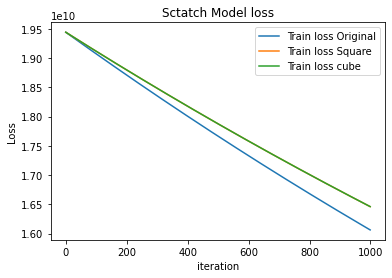

In [23]:
plt.figure

plt.plot(np.arange(len(model.loss)), model.loss, label='Train loss Original')
plt.plot(np.arange(len(model2.loss)), model2.loss, label='Train loss Square')
plt.plot(np.arange(len(model3.loss)), model3.loss, label='Train loss cube')


plt.title('Sctatch Model loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.plot()

## 【problem 10】(Advance task) Derivation of update formula

The equation is derived by J(θ)=1/2mΣ(θx-y)^2 = 1/2mΣ((xθ)^2 -2yxθ +y^2)

We then devide the derivatives ΔJ(θ)/Δθ and

Then = 1/2mΣ(2x^2θ -2yx) = 1/mΣ x(xθ -y)